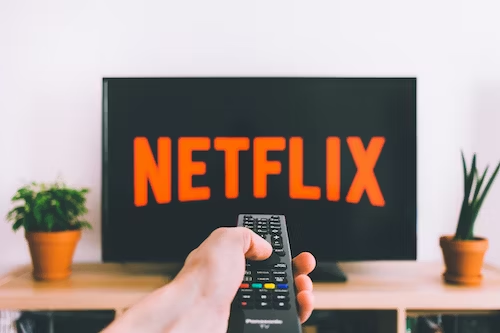

## Introduction

As one of the leading streaming platforms globally, Netflix has revolutionized how we consume entertainment. With its vast library of movies and TV shows, it offers an abundance of choices for viewers around the world.

#### Netflix’s Global Reach
- Netflix has experienced remarkable growth and expanded its presence to become a dominant force in the streaming industry. Here are some noteworthy statistics that showcase its global impact:

##### User Base:
- By the beginning of the second quarter of 2022, Netflix had amassed approximately 222 million international subscribers, spanning over 190 countries (excluding China, Crimea, North Korea, Russia, and Syria). These impressive figures underline the platform’s widespread acceptance and popularity among viewers worldwide.

##### International Expansion:
- With its availability in over 190 countries, Netflix has successfully established a global presence. The company has made significant efforts to localize its content by offering subtitles and dubbing in various languages, ensuring accessibility to a diverse audience.
In this __Exploratory Data Analysis__, we embark on an exciting journey to explore the intriguing patterns, trends, and insights hidden within Netflix’s content landscape. Leveraging the power of Python and its data analysis libraries, we dive into the vast collection of Netflix’s offerings to uncover valuable information that sheds light on content additions, duration distributions, genre correlations, and even the most commonly used words in titles and descriptions.

Through detailed code snippets and visualizations, we peel back the layers of Netflix’s content ecosystem to provide a fresh perspective on how the platform has evolved. By analyzing release patterns, seasonal trends, and audience preferences, we aim better to understand the content dynamics within Netflix’s vast universe.
iverse.

### Importing Neccessary Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings

import warnings
warnings.filterwarnings("ignore")

### Data Understanding

In [33]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [34]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [36]:
df.shape

(8807, 12)

In [37]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Descriptive Statistics
- It is crucial to understand the dataset’s overall characteristics through descriptive statistics. We can gain insights into the numerical attributes such as count, mean, standard deviation, minimum, maximum, and quartiles.

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


# Data Preparation

### Sorting Percentage of Null values in columns in Descending order

In [40]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

director        29.908028
country          9.435676
cast             9.367549
date_added       0.113546
rating           0.045418
duration         0.034064
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64

### Checking of Missing Values in columns

In [41]:
df.duplicated().sum()

0

### Handling Missing values in specific column

For the ‘director’ and ‘cast’ columns, we replace missing values with ‘No Data’ to maintain data integrity and avoid any bias in the analysis.

In [42]:
df["director"].replace(np.nan , "No Data" , inplace=True)
df["cast"].replace(np.nan , "No Data" , inplace=True)

In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### In the ‘country’ column, we fill in missing values with the mode (most frequently occurring value) to ensure consistency and minimize data loss.
##### For the ‘rating’ column, we fill in missing values based on the ‘type’ of the show. We assign the mode of ‘rating’ for movies and TV shows separately.

In [44]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

movies_rating = df.loc[df["type"]=="Movie" , "rating"].mode()[0]
tv_rating = df.loc[df["type"]=="TV Show" , "rating"].mode()[0]

#filling missing rating values based on type of the content

df["rating"]= df.apply(lambda x : movies_rating if x["type"]=="Movie" and pd.isna(x["rating"])
                        else tv_rating if x["type"]=="TV Shows" and pd.isna(x["rating"]) else x["rating"] , axis=1)

##### For the ‘duration’ column, we fill in missing values based on the ‘type’ of the show. We assign the mode of ‘duration’ for movies and TV shows separately.

In [45]:
movie_duration = df.loc[df["type"]=="Movie" , "duration"].mode()[0]
tv_duration = df.loc[df["type"]=="TV Show" , "duration"].mode()[0]

#filling missing values based on the "type" of the content.

df["duration"] = df.apply(lambda x : movie_duration if x["type"]=="Movie" and pd.isna(x["duration"])
                           else tv_duration if x["type"]== "TV Show" and pd.isna(x["duration"])
                           else x["duration"] , axis=1)

### Data Handling

#### We convert the ‘date_added’ column to datetime format using pd.to_datetime() to enable further analysis based on date-related attributes.

In [46]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [47]:
df["date_added"] = df["date_added"].astype("category")

In [48]:
df["date_added"] = df["date_added"].apply(lambda x: x.strip())  # Remove leading/trailing spaces

# Try to convert the dates, handling the potential mismatched format
try:
    df["date_added"] = pd.to_datetime(df["date_added"], format="%B %d, %Y")
except ValueError:
    print("Some dates did not match the expected format. Adjusting...")

    # If the format is inconsistent, try to infer the format for each date individually
    df["date_added"] = pd.to_datetime(df["date_added"], infer_datetime_format=True, errors='coerce')

# If there are still NaT (Not a Time) values, you may need to further investigate or handle those cases

In [49]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Data Transformation: Cast, Country, Listed In, and Director
- To analyze categorical attributes more effectively, we transform them into separate dataframes, allowing for more leisurely exploration and analysis.

- For the ‘cast,’ ‘country,’ ‘listed_in,’ and ‘director’ columns, we split the values based on the comma separator and created separate rows for each value. This transformation enables us to analyze the data at a more granular level.

In [50]:
# Splitting and expanding the 'cast' column
df_cast = df['cast'].str.split(',', expand=True).stack()
df_cast = df_cast.reset_index(level=1, drop=True).to_frame('cast')
df_cast['show_id'] = df['show_id']

# Splitting and expanding the 'country' column
df_country = df['country'].str.split(',', expand=True).stack()
df_country = df_country.reset_index(level=1, drop=True).to_frame('country')
df_country['show_id'] = df['show_id']

# Splitting and expanding the 'listed_in' column
df_listed_in = df['listed_in'].str.split(',', expand=True).stack()
df_listed_in = df_listed_in.reset_index(level=1, drop=True).to_frame('listed_in')
df_listed_in['show_id'] = df['show_id']

# Splitting and expanding the 'director' column
df_director = df['director'].str.split(',', expand=True).stack()
df_director = df_director.reset_index(level=1, drop=True).to_frame('director')
df_director['show_id'] = df['show_id']

### Exploratory Data Analysis

##### Distribution of Content Types
- To determine the distribution of content in the Netflix library, we can calculate the percentage distribution of content types (movies and TV shows) using the following code:

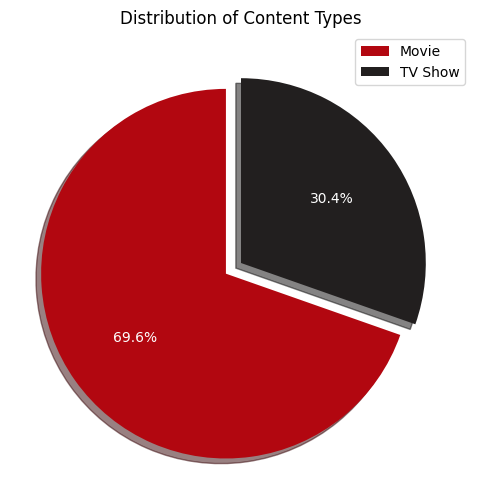

In [51]:
#calculate the percentage distribution of content types
x= df.groupby(["type"])["type"].count()
y= len(df)
r = ((x/y)*100).round(2)

#Creating new Dataframe and storing the value "r"
mf_ratio = pd.DataFrame(r)
mf_ratio.rename({"type":"%"} , axis=1 , inplace=True)

#plot the #D effect pie chart
plt.figure(figsize=(10,6))
colors = ["#b20710" , "#221f1f"]
explode=(0.1 , 0)

plt.pie(mf_ratio["%"] , labels=mf_ratio.index , explode=explode , colors=colors , shadow=True ,
       startangle=90 , textprops={"color":"white"} , autopct="%.1f%%")

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()

### Top 10 Countries where Netflix is Popular

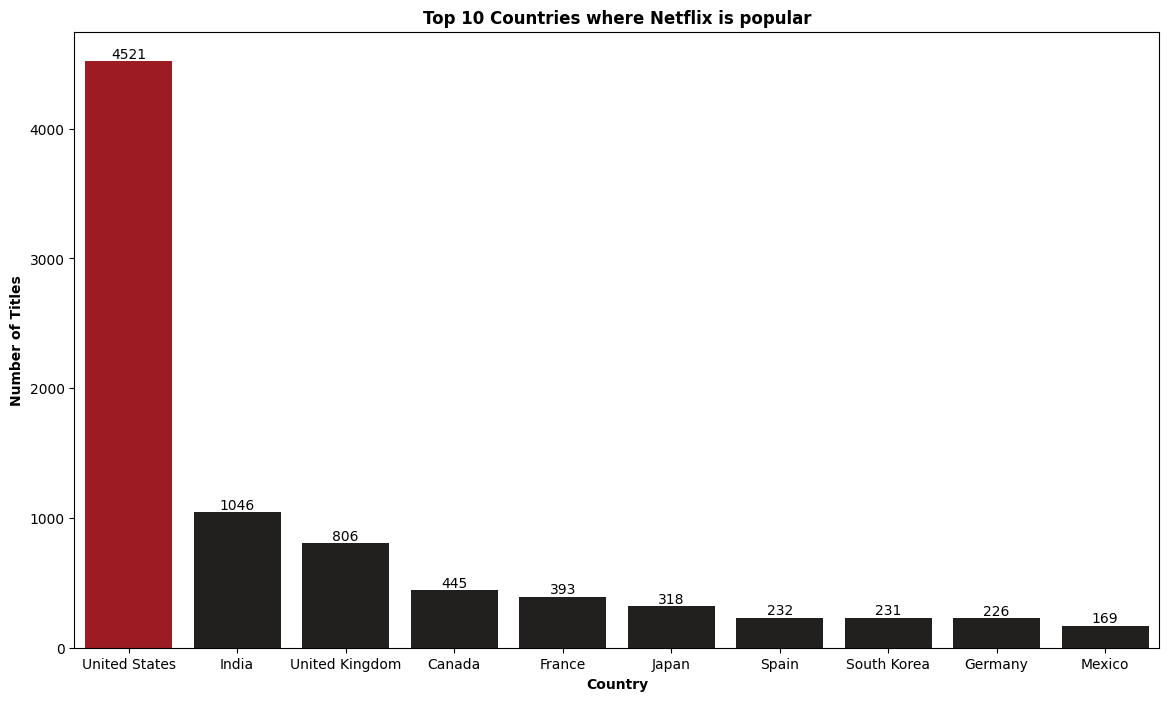

In [52]:
# Remove white spaces from the "country" column
df_country["country"] = df_country["country"].str.strip()

# Drop rows with missing or empty values in the "country" column
df_country = df_country.dropna(subset=["country"])

# Find value counts
country_counts = df_country["country"].value_counts()

# Select top 10 Countries
top_10_countries = country_counts.head(10)

# Plot the barchart
plt.figure(figsize=(14, 8))
colors = ["#b20710"] + ["#221f1f"] * (len(top_10_countries) - 1)
bar_plot = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=colors)

plt.xlabel("Country", fontweight="bold")
plt.ylabel("Number of Titles", fontweight="bold")
plt.title("Top 10 Countries where Netflix is popular", fontweight="bold")

# Adding count value in each bar
for index, value in enumerate(top_10_countries.values):
    bar_plot.text(index, value, str(value), ha="center", va="bottom")

plt.show()

### Top 10 Actors by Movies/TV Show Count

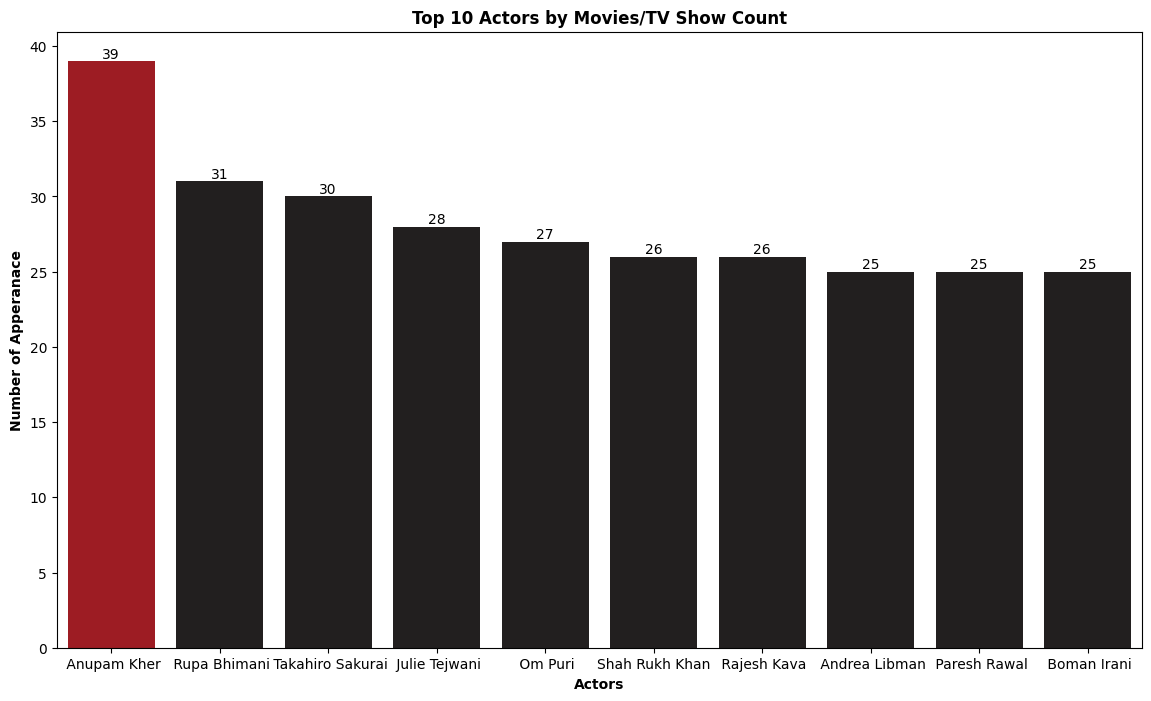

In [53]:
cast_counts= df_cast["cast"].value_counts()[1:]

#Select top 10 actors
top_10_cast = cast_counts.head(10)

plt.figure(figsize=(14,8))
colors = ["#b20710"] + ["#221f1f"] * (len(top_10_cast)-1)
bar_plot = sns.barplot(x=top_10_cast.index , y=top_10_cast.values , palette=colors)

plt.xlabel("Actors" , fontweight="bold")
plt.ylabel("Number of Apperanace" , fontweight="bold")
plt.title("Top 10 Actors by Movies/TV Show Count" , fontweight="bold")

for index , value in enumerate(top_10_cast.values):
    bar_plot.text(index , value , str(value) , ha="center" , va="bottom")

plt.show()

### Top 10 Directors by Movies/TV Show Count

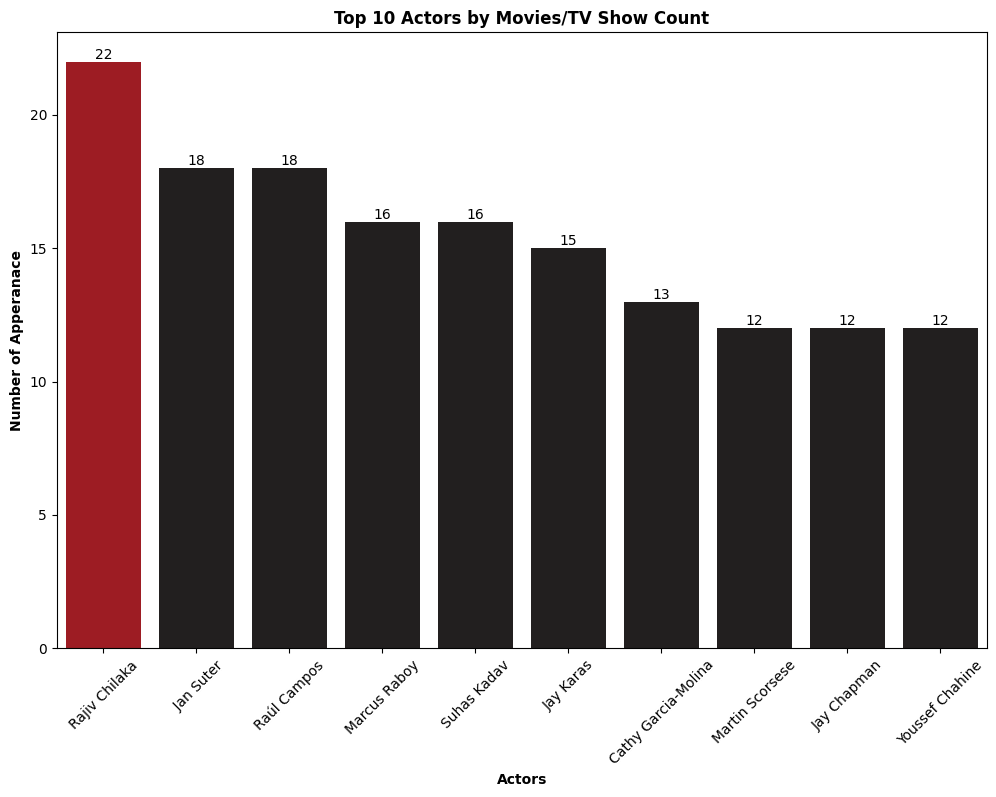

In [54]:
directors_counts= df_director["director"].value_counts()[1:]

#Select top 10 actors
top_10_director = directors_counts.head(10)

plt.figure(figsize=(12,8))
colors = ["#b20710"] + ["#221f1f"] * (len(top_10_director)-1)
bar_plot = sns.barplot(x=top_10_director.index , y=top_10_director.values , palette=colors)

plt.xlabel("Actors" , fontweight="bold")
plt.ylabel("Number of Apperanace" , fontweight="bold")
plt.title("Top 10 Actors by Movies/TV Show Count" , fontweight="bold")
plt.xticks(rotation = 45)

for index , value in enumerate(top_10_director.values):
    bar_plot.text(index , value , str(value) , ha="center" , va="bottom")

plt.show()

### Top 10 Categories by Movies/TV Show Count

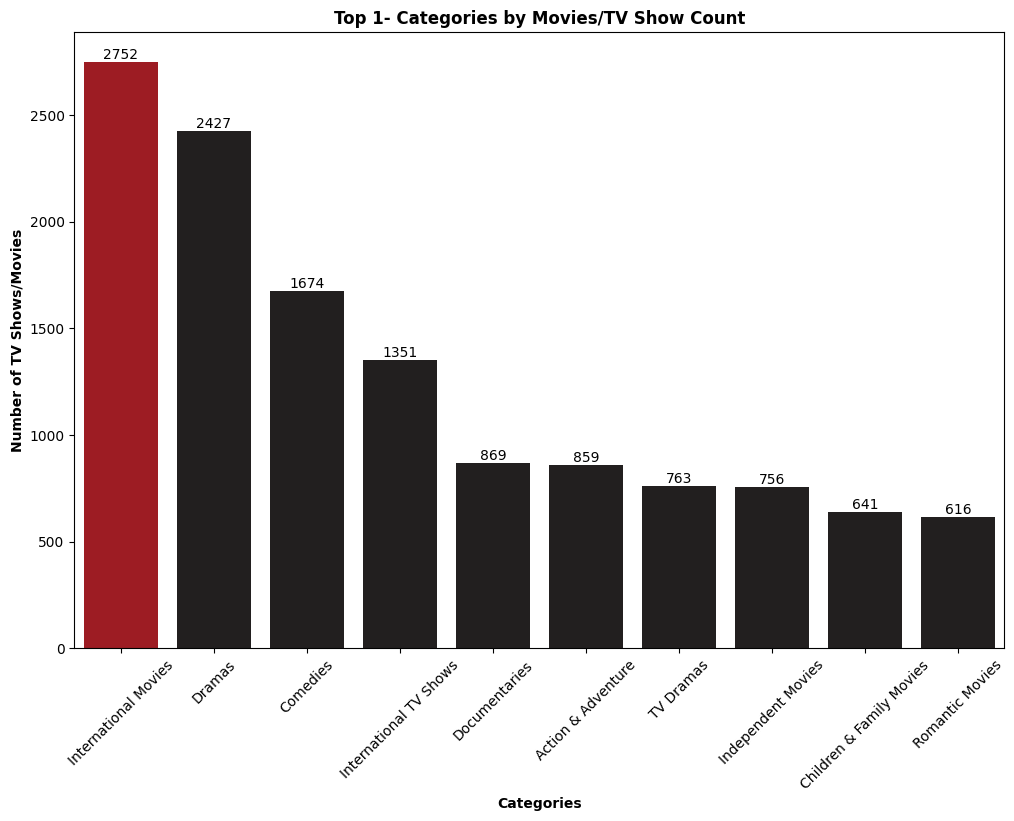

In [55]:
df_listed_in["listed_in"] = df_listed_in["listed_in"].str.strip()

listed_in_counts = df_listed_in["listed_in"].value_counts()

top_10_Categories = listed_in_counts.head(10)

plt.figure(figsize=(12,8))
bar_plot= sns.barplot(x=top_10_Categories.index , y=top_10_Categories.values , palette=colors)

plt.xlabel("Categories" , fontweight="bold")
plt.ylabel("Number of TV Shows/Movies" , fontweight="bold")
plt.title("Top 1- Categories by Movies/TV Show Count" , fontweight="bold")
plt.xticks(rotation=45)

for index , value in enumerate(top_10_Categories.values):
    bar_plot.text(index , value , str(value) , ha="center" , va="bottom")

plt.show()

### Distribution of Range

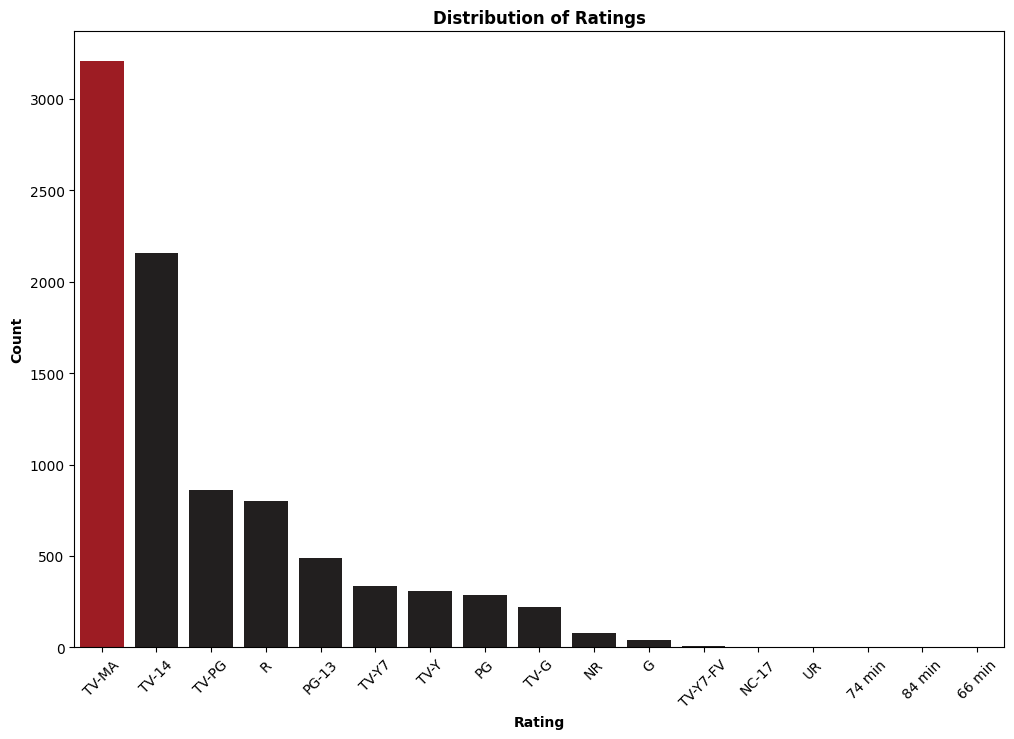

In [56]:
# Count the occurrences of each rating
rating_counts = df['rating'].value_counts()

# Create a bar chart to visualize the ratings
plt.figure(figsize=(12, 8))
colors = ['#b20710'] + ['#221f1f'] * (len(rating_counts) - 1)
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette=colors)

# Customize the plot
plt.xlabel('Rating' , fontweight="bold")
plt.ylabel('Count' , fontweight="bold")
plt.title('Distribution of Ratings' , fontweight="bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### Distribution of Movies Length and TV Shows Episodes Count

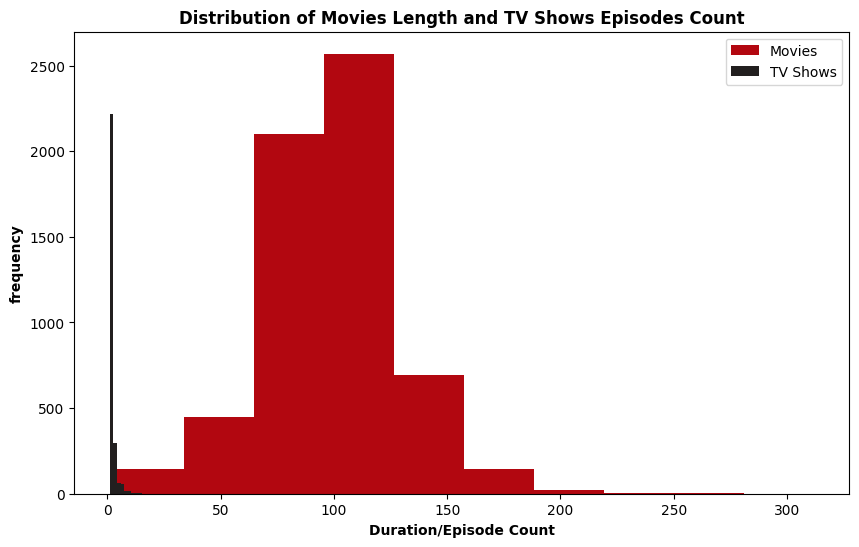

In [57]:
# Filter the DataFrame to include only Movies and TV Shows
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

movies_length = df_movies["duration"].str.extract("(\d+)" , expand=False).astype(int)
tvshows_length = df_tv_shows["duration"].str.extract("(\d+)" , expand=False).astype(int)

plt.figure(figsize=(10,6))
plt.hist(movies_length , bins=10 , color="#b20710" , label="Movies")
plt.hist(tvshows_length , bins=10 , color="#221f1f" , label="TV Shows")

plt.xlabel("Duration/Episode Count" , fontweight="bold")
plt.ylabel("frequency" , fontweight="bold")
plt.title("Distribution of Movies Length and TV Shows Episodes Count" , fontweight="bold")
plt.legend(loc="best")

plt.show()

### Most Common words in Titles

In [58]:
pip install wordcloud

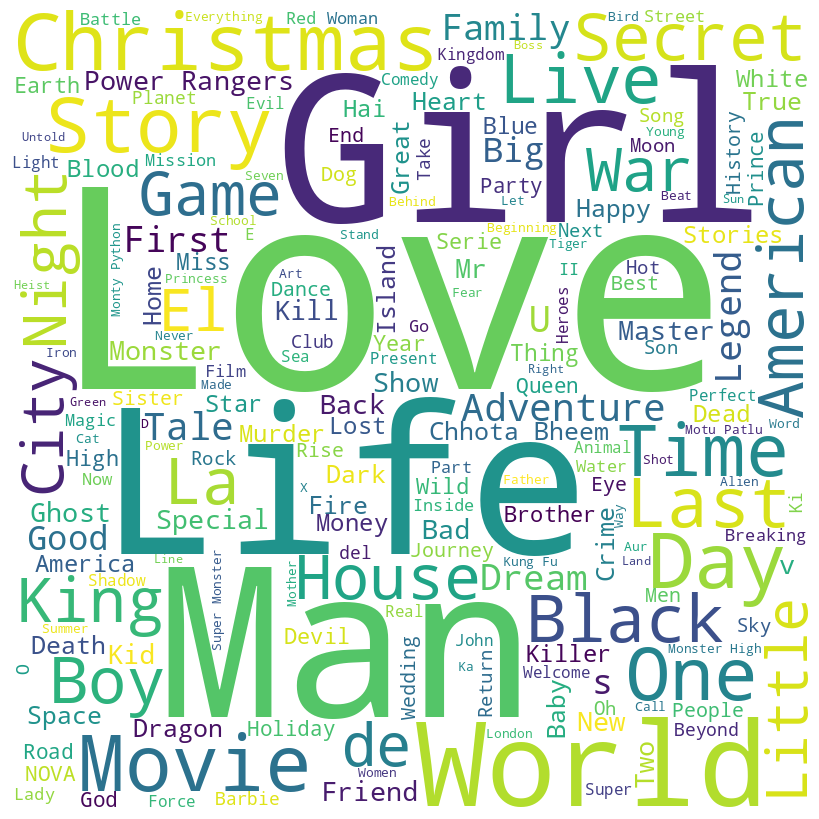

In [59]:
from wordcloud import WordCloud

# Concatenate all the "titles" from the df in to a single string
text = " ".join(df["title"])
wordcloud = WordCloud(width=800 , height=800 , background_color="white" ,
                     min_font_size=10).generate(text)

#plot the Wordcloud image
plt.figure(figsize=(8,8) , dpi=100 , facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

### Most Common words in Description

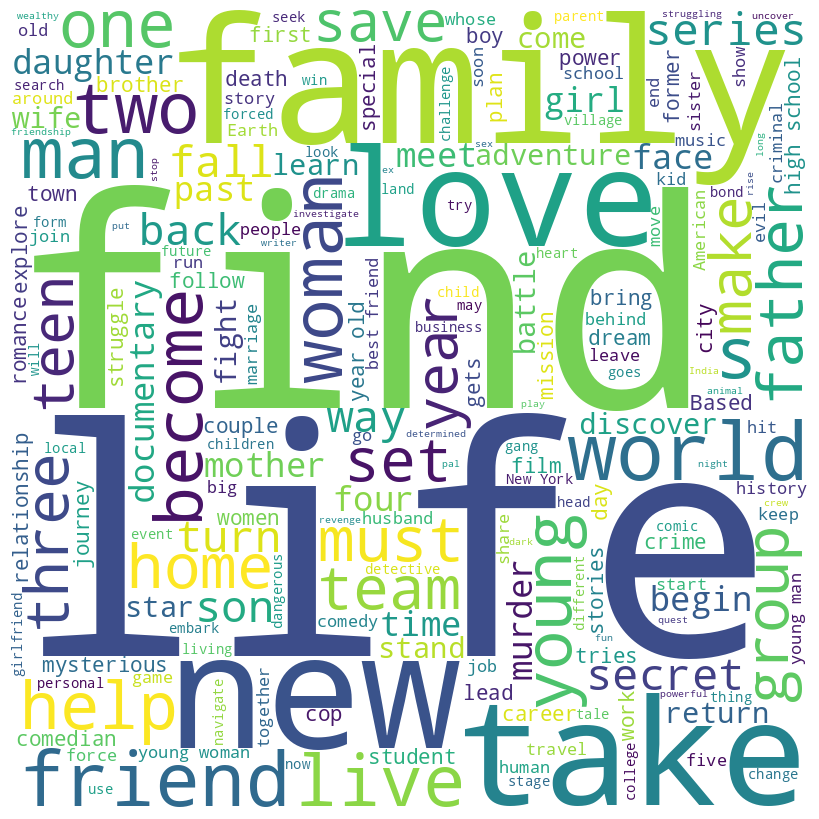

In [60]:
# Convert "description" column to strings and handle NaN values
df["description"] = df["description"].astype(str)

# Concatenate all the "description" from the df into a single string
text = " ".join(df["description"])

# Rest of your code for creating the WordCloud
wordcloud = WordCloud(width=800, height=800, background_color="white", min_font_size=10).generate(text)

# Plot the Wordcloud image
plt.figure(figsize=(8, 8), dpi=100, facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


## Duration Distribution for Movies and TV Shows

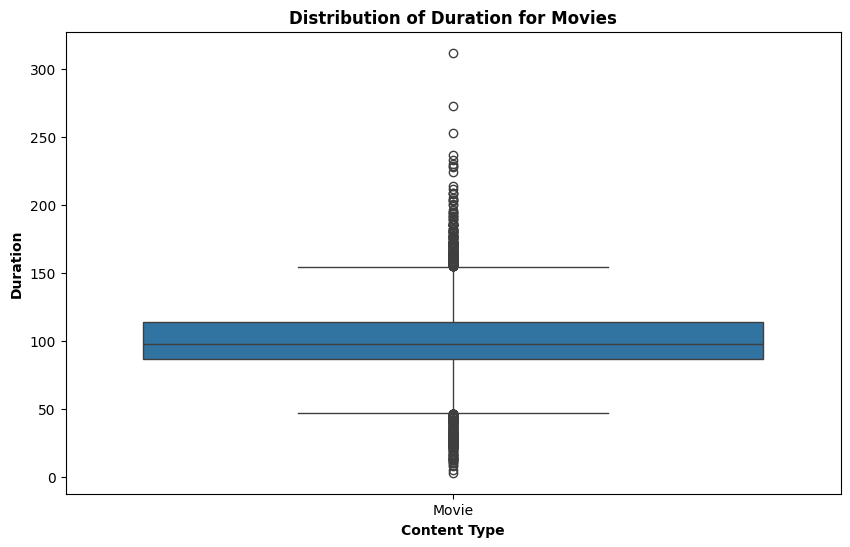

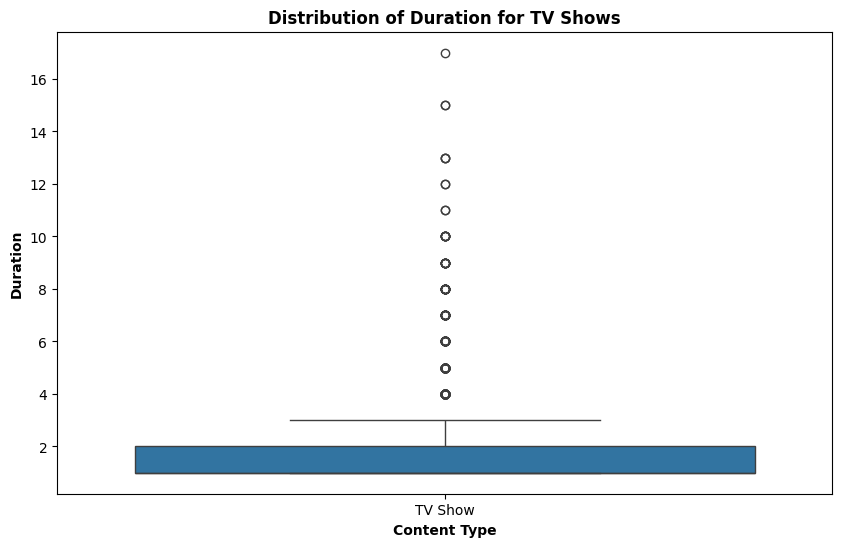

In [61]:
df_movies = df[df['type'] == 'Movie']
df_tv_shows = df[df['type'] == 'TV Show']

movies_length = df_movies["duration"].str.extract("(\d+)" , expand=False).astype(int)
tvshows_length = df_tv_shows["duration"].str.extract("(\d+)" , expand=False).astype(int)

df_movies['duration'] = df_movies['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for movie duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_movies, x='type', y='duration')
plt.xlabel('Content Type' , fontweight="bold")
plt.ylabel('Duration' , fontweight="bold")
plt.title('Distribution of Duration for Movies' , fontweight="bold")
plt.show()


# Extracting and converting the duration for TV shows
df_tv_shows['duration'] = df_tv_shows['duration'].str.extract('(\d+)', expand=False).astype(int)

# Creating a boxplot for TV show duration
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_tv_shows, x='type', y='duration')
plt.xlabel('Content Type' , fontweight="bold")
plt.ylabel('Duration' , fontweight="bold")
plt.title('Distribution of Duration for TV Shows' , fontweight="bold")
plt.show()


## Genre Correlation Distribution using Heatmap

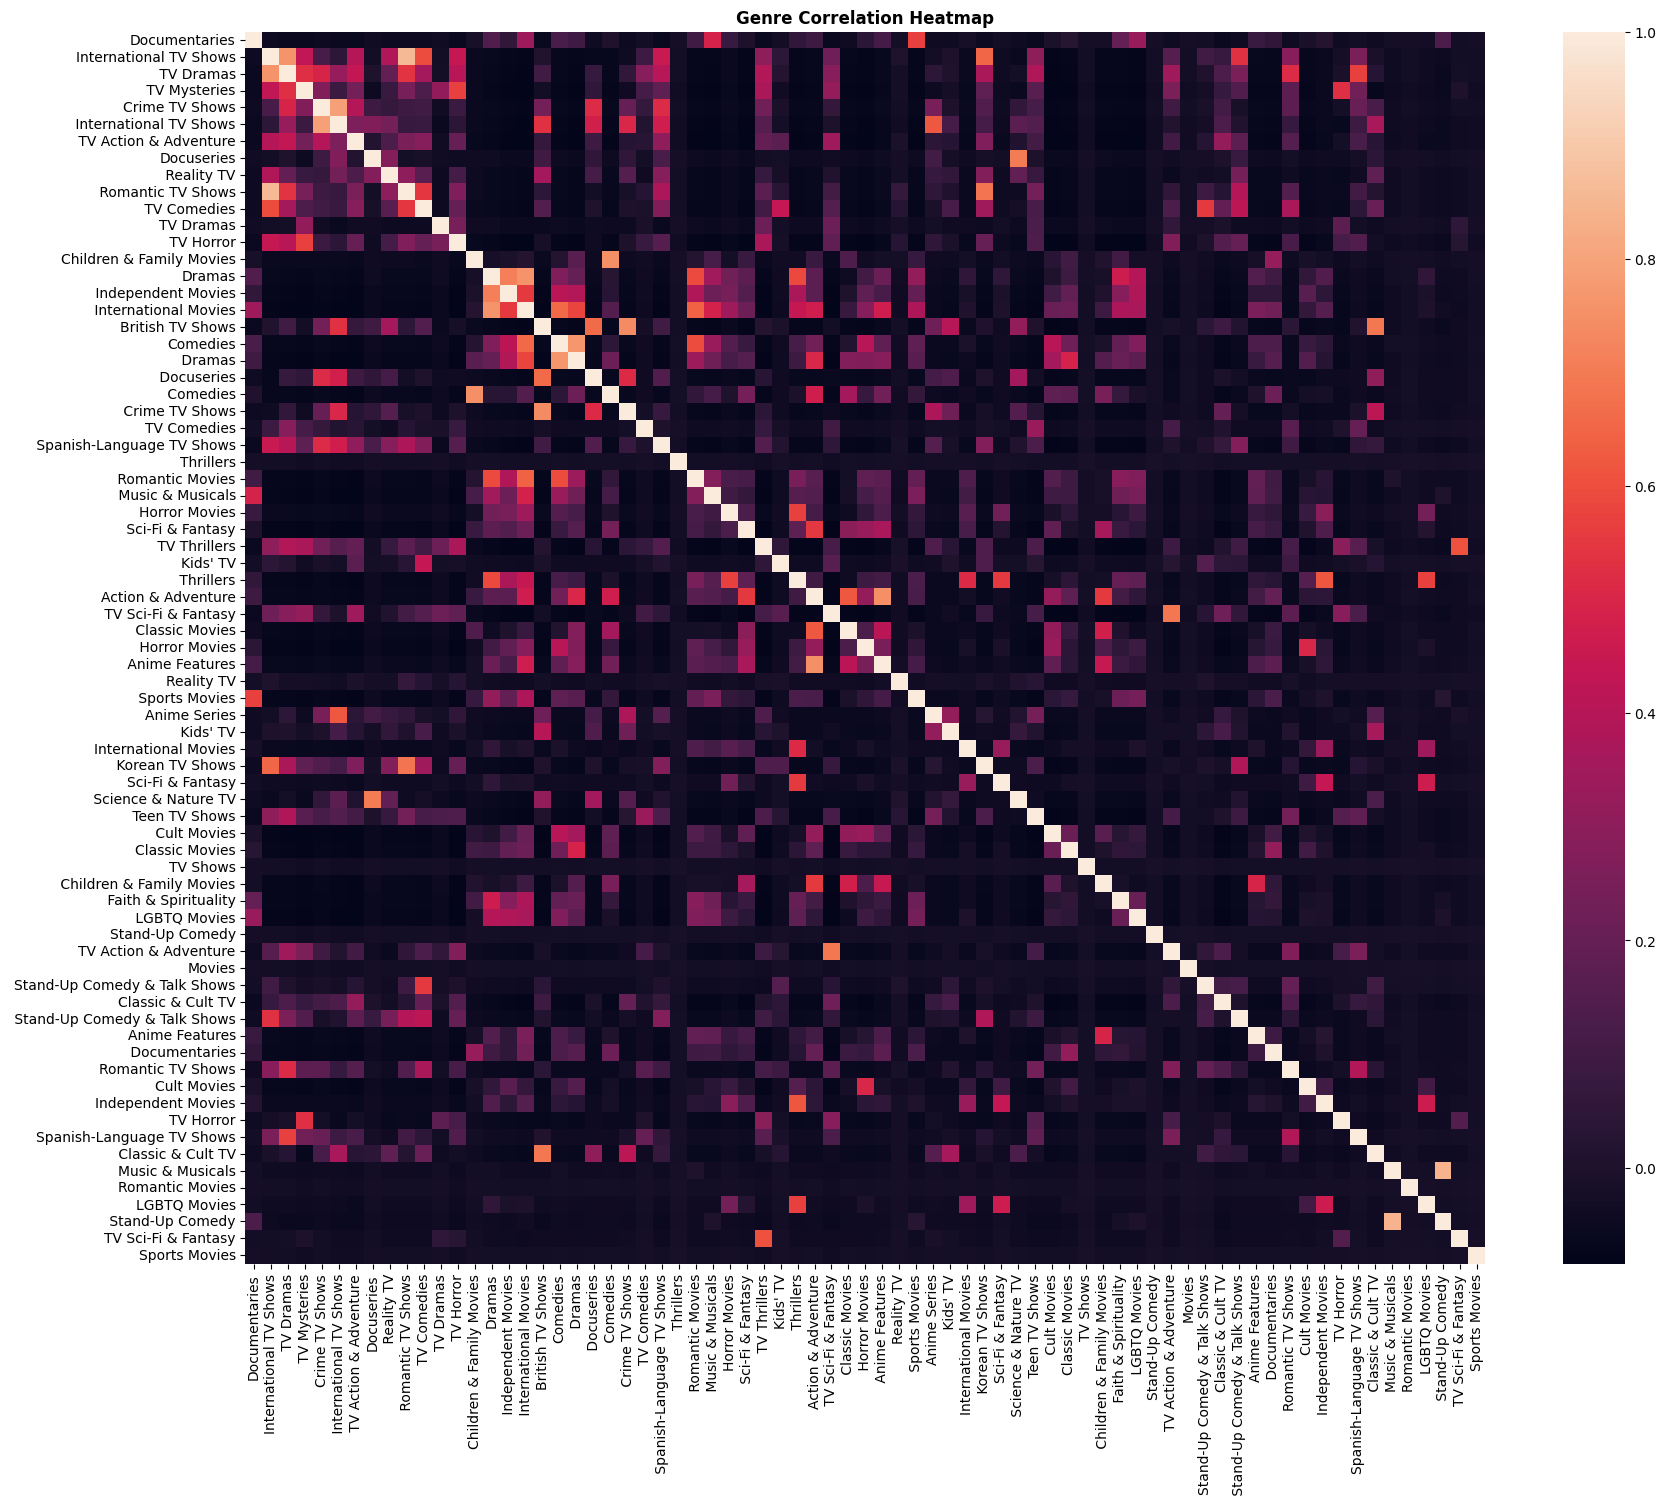

In [69]:
# Extracting Unique genres from ["listed_in"] column
genres = df["listed_in"].str.split("," , expand=True).stack().unique()

#Create a new DatafRame to Store genre_data
genre_data = pd.DataFrame(index=genres, columns=genres, dtype=float)

#fill the dataframe genre_data with Zeros
genre_data.fillna(0 , inplace=True)

#Iterate over original Dataframe and update the genre_data Dataframe

for _, row in df.iterrows():
  listed_in=row["listed_in"].split(",")
  for genre1 in listed_in:
    for genre2 in listed_in:
      genre_data.at[genre1 , genre2] += 1

#create a correlation matrix

correlation_matrix = genre_data.corr()

#Create the heatmap

plt.figure(figsize=(20,16) , dpi=100)

sns.heatmap(correlation_matrix , annot=False , cmap="rocket")
plt.title("Genre Correlation Heatmap" , fontweight="bold")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()

## Conclusion

In the exploratory data analysis (EDA) of Netflix TV shows and movies, it was observed that the platform offers a diverse content library with a mix of both TV shows and movies. The majority of the content is in English, reflecting a global appeal. The release trend over the years indicates a significant growth in the number of titles, with a notable surge in recent years. Additionally, the distribution of content ratings suggests a balanced representation across various age groups. Further analysis could explore genre preferences and regional variations to gain deeper insights into user preferences on the platform.






